This is a test note book for calculation purposes

In [2]:
import numpy as np
import pandas as pd 
import math as m

1.1.1  
toss coin n times  
print every 100, proportion of heads - .5  
\# of heads minus half # total tosses  

In [85]:
def toin_coss_1(x: float) -> float:
    heads = 0
    for i in range(x):
        heads += np.random.normal(.5) > .5
        if (i % 100 == 0 and i > 0):
            print(heads/i - 1)
            print(heads - i*.5)
toin_coss_1(1000)

-0.48
2.0
-0.51
-2.0
-0.4966666666666667
1.0
-0.475
10.0
-0.486
7.0
-0.505
-3.0
-0.5057142857142858
-4.0
-0.5037499999999999
-3.0
-0.5022222222222222
-2.0


1.1.2  
toss coin n times  
record whether proportion of heads is within .1 of .5  
repeat 100 times  
size of n for 95/100 times proportion between .4 and .6?  

In [167]:
def coin_toss_2(x: float, n: float) -> float:
    results = []
    for i in range(x):
        heads = 0
        for i in range(n):
            heads += np.random.normal(.5) >= .5
        heads = (heads/n - .5) > abs(.1)
        results.append(heads)
    return sum(results)
coin_toss_2(100, 1000)

0

In [172]:
import matplotlib.pyplot as plt
%matplotlib inline

x = range(1,200)
y = [coin_toss_2(100,i) for i in x]
y = [100 - i for i in y]

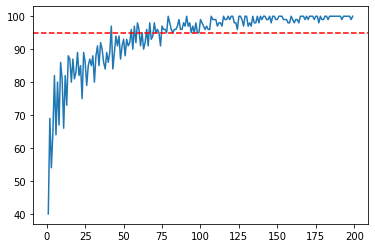

In [173]:
plt.plot(x,y)
plt.axhline(95, ls = 'dashed', color = 'r')

1.1.3  
simulate roll of 3 dice  
keep track proportion sum is 9 and sum is 10  
gamblers correct that 10 is more common than 9?

In [3]:
def three_dice_roll(n: float) -> float:
    results = []
    for i in range(n):
        results.append(np.sum(np.random.randint(1,7, size = 3)))
    return results
test = three_dice_roll(100000)
test.count(9)/test.count(10)


0.9242233086263997

1.1.4  
.6 win on serve  
.5 win on opponent serve  
i serve first  
probability of winning a game?  

In [364]:
def raquetball() -> float:
    my_points = 0
    opponent_points = 0
    points = 0
    my_serve = True
    
    while points < 21:
        if (my_serve == True):
            point = np.random.random()
            if point <= .6: my_points += 1
            if point > .6: my_serve = False
        if (my_serve == False):
            point = np.random.random()
            if point <= .5: opponent_points += 1
            if point > .5: my_serve = True
        points = max(my_points, opponent_points)
    return my_points > opponent_points

raquetball()

def raquetball_sim(n: float) -> float:
    result = []
    for i in range(n):
        result.append(raquetball())
    return sum(result)
raquetball_sim(1000)/1000

0.837

1.1.5  
three dice = 6 at least once in n rolls = f(n)  
determine smallest value of n for favorable bet  
(est is 150)

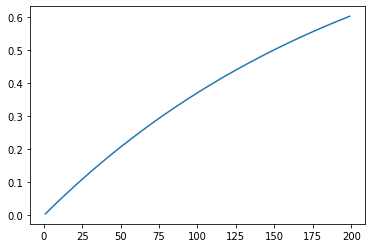

In [23]:
1-(215/216)**150
#(1/(.00145))**2
def dice_roll(x: float) -> float:
    return 1-(215/216)**x
x = range(1,200)
y = [dice_roll(i) for i in x]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y)

1.1.6  
roulette wheel: 38 total, 36 even split red/black  
winnings for 1000 bets on red  

In [32]:
def roulette(x: float) -> float:
    win = 0
    for i in range(x):
        win += np.random.random() <= (36/2)/38
    return win
roulette(1000)

452

In [ ]:
1.1.7  
roulette again  
plot winnings of red 5000 times  
plot winnings of red 17 5000 times: 17 = +$35  


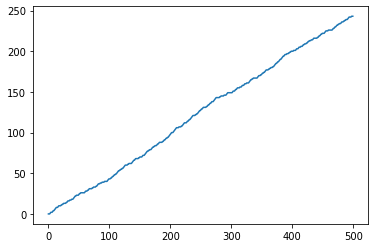

In [49]:
def roulette_2(x: float):
    rounds = range(x)
    winnings = [None]*x
    for i in rounds:
        winnings[i] = 1 if np.random.random() <= (36/2)/38 else 0
    winnings =  np.cumsum(winnings)
    plt.plot(rounds,winnings)
roulette_2(500)

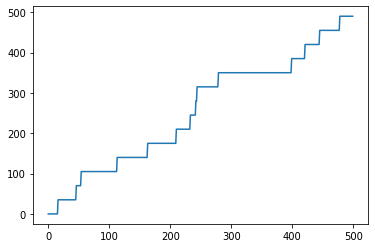

In [83]:
def roulette_3(n: float, bet: float):
    rounds = range(n)
    winnings = [None]*n
    for i in rounds:
        winnings[i] = 35 if np.random.randint(1,38) == bet else 0
    winnings = np.cumsum(winnings)
    plt.plot(rounds, winnings)
roulette_3(500, 17)

1.1.9  
labouchere roulette  
bet sum of first and last number from list of numbers on red  
win, delete first and last numbers  
lose, add amount of last bet to end of your list  
continue unlist list is empty  
should win the sum of the original list  

In [155]:
def labouchere(bet = list):
    winnings = 0
    while len(bet) > 0:
        if len(bet) == 1:
            money = bet[0]
        else:
            money = np.sum([bet[0], bet[-1]])
        spin = np.random.random() <= (36/2)/38
        if spin:
            bet.pop()
            bet.pop(0)
            winnings += money
        else:
            bet.append(money)
            winnings  money
    return winnings
labouchere([1,2,3,4])

10